##CHATBOTS with LangGraph

In [2]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.2 MB/s eta 0:00:00


In [4]:
!pip install langchain langchain-groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00


In [6]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith_api_key = userdata.get('LANGSMITH_API_KEY')

In [7]:
import os
# os.environ["GROQ_API_KEY"] = groq_api_key
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CurseLangGraph"

In [95]:
from langchain_groq import ChatGroq

In [96]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name= "Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78b76f7fba60>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78b76f7f9ff0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

##Start Building Chatbot Using Langgraph

In [97]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages #as we keep on adding messages over here , the state of graph is change, for tracking
from langchain.schema import HumanMessage


In [98]:
class State(TypedDict):
  # Messages have type "list". The "add_messages" functions
  # in annotation it should mwkr state updated
  # (in this case, it qappend messages to list, rather than overwriting them)
  messages: Annotated[list, add_messages]
  #  messages: Annotated[list[HumanMessage], add_messages] # Store messages as HumanMessage objects
graph_builder = StateGraph(State)


In [99]:
graph_builder

In [100]:
def chatbot(state: State):
  # message_content = [m.content for m in state['messages']]
  # response = llm.invoke("\n".join(message_content)) # Join messages with newline
  # return {"messages": [HumanMessage(content=str(response))]}
  # messages = state['messages']
  # if messages:
  #   last_message = message[-1]
  # else:
  #   last_message = ""
  return {"messages":llm.invoke(state['messages'])}

In [101]:
graph_builder.add_node("chatbot",chatbot)

In [102]:
graph_builder

In [103]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [104]:
graph = graph_builder.compile()

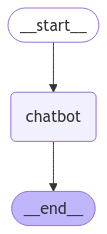

In [105]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)
  pass

In [106]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({"messages":("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messages"].content)


User: Hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.6e-07, 'queue_time': 0.015261167, 'total_time': 0.027273087}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-916db61d-043f-4787-b268-5fe74fe9c12d-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.6e-07, 'queue_time': 0.015261167, 'total_time': 0.027273087}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-916db61d-043f-478